In [1]:
from src.make_db import create_movies_db

In [2]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [72]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("data/movies.db")

In [73]:
pd.read_sql("""
SELECT *
FROM tn_movie_budgets
""", conn)

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...,...
5777,5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [90]:
df = pd.read_sql("""
SELECT *
FROM tn_movie_budgets
""", conn)

In [75]:
df["production_budget"] = df["production_budget"].apply(lambda x: int(x.replace("$", "").replace(",", "")))
df["domestic_gross"] = df["domestic_gross"].apply(lambda x: int(x.replace("$", "").replace(",", "")))
df["worldwide_gross"] = df["worldwide_gross"].apply(lambda x: int(x.replace("$", "").replace(",", "")))
df

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...,...
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idx                5782 non-null   int64 
 1   id                 5782 non-null   int64 
 2   release_date       5782 non-null   object
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   int64 
 5   domestic_gross     5782 non-null   int64 
 6   worldwide_gross    5782 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 316.3+ KB


In [77]:
df["domestic_profit"] = df["domestic_gross"] - df["production_budget"]
df["worldwide_profit"] = df["worldwide_gross"] - df["production_budget"]
df.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747


In [78]:
df.to_sql("tn_movie_budgets_better", conn)

ValueError: Table 'tn_movie_budgets_better' already exists.

In [79]:
df = pd.read_sql("""
SELECT *
FROM tn_movie_budgets_better
""", conn)


,index,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279
1,1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
2,2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
3,3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963
4,4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747
...,...,...,...,...,...,...,...,...,...,...
5777,5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-7000
5778,5778,5778,79,"Apr 2, 1999",Following,6000,48482,240495,42482,234495
5779,5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-3662
5780,5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,-1400


In [80]:
pd.read_sql("""
SELECT *
FROM tn_movie_budgets_better
ORDER BY worldwide_profit DESC
""", conn)

,index,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279
1,42,42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,459363944,2008208395
2,6,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
3,5,5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
4,33,33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864
...,...,...,...,...,...,...,...,...,...,...
5777,352,352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-98287549,-94635231
5778,341,341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,-106900000
5779,193,193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-128607242,-110450242
5780,194,194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000,-150000000


In [81]:
pd.read_sql("""
SELECT DISTINCT movie, worldwide_profit, genres, runtime_minutes
FROM tn_movie_budgets_better
INNER JOIN imdb_title_basics
    ON tn_movie_budgets_better.movie = imdb_title_basics.primary_title
ORDER BY worldwide_profit
""", conn)

,movie,worldwide_profit,genres,runtime_minutes
0,Dark Phoenix,-200237650,"Action,Adventure,Sci-Fi",113.0
1,Mars Needs Moms,-110450242,"Adventure,Animation,Family",88.0
2,Men in Black: International,-106900000,"Action,Adventure,Comedy",115.0
3,Bright,-90000000,"Action,Crime,Fantasy",117.0
4,Call of the Wild,-82000000,"Adventure,Animation,Family",NaN
...,...,...,...,...
3777,Jurassic World,1433854864,"Action,Adventure,Sci-Fi",124.0
3778,Avengers: Infinity War,1748134200,"Action,Adventure,Sci-Fi",149.0
3779,Titanic,2008208395,Adventure,NaN
3780,Titanic,2008208395,Family,115.0


In [82]:
df = pd.read_sql("""
SELECT *
FROM imdb_title_basics
""", conn).dropna(subset = ['original_title'])
df

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [83]:
pd.read_sql("""
SELECT *
FROM imdb_title_basics
WHERE primary_title = 'Ângelo de Sousa - Tudo o Que Sou Capaz'
""", conn)

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
1,66990,tt3815124,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
2,66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
3,66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
4,66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
5,66994,tt3815132,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
6,66995,tt3815134,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"


In [85]:
len(df)-len(df.drop_duplicates())

0

In [86]:
df = df.drop(columns = ["idx", "tconst", "original_title"])
df

,primary_title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,Dankyavar Danka,2013,NaN,Comedy
146142,6 Gunn,2017,116.0,None


In [88]:
df.drop_duplicates()

,primary_title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,Dankyavar Danka,2013,NaN,Comedy
146142,6 Gunn,2017,116.0,None


In [13]:
df["genres"] = df["genres"].apply(lambda x: x.split(",") if type(x) == str else x)
df

KeyError: 'genres'

In [14]:
df = df.explode('genres')

KeyError: 'genres'

In [15]:
df.isna().sum()

idx                  0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
domestic_profit      0
worldwide_profit     0
dtype: int64

In [16]:
df = df.dropna(subset = ["genres"])

KeyError: ['genres']

In [17]:
df.to_sql("imdb_title_basics_better", conn)

ValueError: Table 'imdb_title_basics_better' already exists.

In [18]:
pd.read_sql("""
SELECT *
FROM imdb_title_basics_better
""", conn)

,idx,primary_title,start_year,runtime_minutes,genres
0,0,Sunghursh,2013,175.0,Action
1,0,Sunghursh,2013,175.0,Crime
2,0,Sunghursh,2013,175.0,Drama
3,1,One Day Before the Rainy Season,2019,114.0,Biography
4,1,One Day Before the Rainy Season,2019,114.0,Drama
...,...,...,...,...,...
229543,146138,The Secret of China,2019,NaN,War
229544,146139,Kuambil Lagi Hatiku,2019,123.0,Drama
229545,146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
229546,146141,Dankyavar Danka,2013,NaN,Comedy


In [19]:
df = pd.read_sql("""
SELECT *
FROM tmdb_movies
ORDER BY popularity DESC
""", conn)

In [20]:
df.head()

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
1,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
2,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
3,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
4,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


In [21]:
df = df.drop(columns = ["genre_ids", "original_language", "id"])
df.head()

,idx,original_title,popularity,release_date,title,vote_average,vote_count
0,23811,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
1,11019,John Wick,78.123,2014-10-24,John Wick,7.2,10081
2,23812,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
3,11020,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
4,5179,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


In [22]:
df = df.set_index("idx")
df.head()

,original_title,popularity,release_date,title,vote_average,vote_count
idx,,,,,,
23811,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


In [23]:
df = df.drop(columns = ["original_title"])
df.head()

,popularity,release_date,title,vote_average,vote_count
idx,,,,,
23811,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,78.123,2014-10-24,John Wick,7.2,10081
23812,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,50.289,2012-05-04,The Avengers,7.6,19673


In [24]:
df.to_sql("tmdb_movies_better", conn)

ValueError: Table 'tmdb_movies_better' already exists.

In [ ]:
pd.read_sql("""
SELECT *
FROM tmdb_movies_better
JOIN imdb_title_basics_better
    ON tmdb_movies_better.title = imdb_title_basics_better.primary_title
JOIN tn_movie_budgets_better
    ON imdb_title_basics_better.primary_title = tn_movie_budgets_better.movie
""", conn)

In [ ]:
df = pd.read_sql("""
SELECT *
FROM tmdb_movies_better
JOIN imdb_title_basics_better
    ON tmdb_movies_better.title = imdb_title_basics_better.primary_title
JOIN tn_movie_budgets_better
    ON imdb_title_basics_better.primary_title = tn_movie_budgets_better.movie
""", conn)
df.head()

In [ ]:
df = df.drop(columns = ["idx"])
df.head()

In [ ]:
df = df.drop(columns = ["id", "movie", "primary_title",])
df.head()

In [ ]:
df = df.set_index("index")
df.head()

In [ ]:
df = df.drop(columns = ["start_year"])
df.head()

In [ ]:
df = df.loc[:,~df.columns.duplicated()]

In [25]:
df.groupby("genres").mean().sort_values("worldwide_profit", ascending = False)

KeyError: 'genres'

In [26]:
df.to_sql("general_movie_stats", conn)

ValueError: Table 'general_movie_stats' already exists.

In [47]:
dfgenres = pd.read_sql("""
SELECT *,
vote_average*vote_count AS total_votes
FROM general_movie_stats
WHERE vote_count > 100 AND domestic_gross > 0 AND worldwide_gross > 0
ORDER BY popularity DESC
""", conn).drop_duplicates()
dfgenres["title"] = dfgenres["title"].map(lambda x: x.replace(" ", "_").replace(":", "").replace(",", "").replace("-", "").replace("'", "").lower())
dfgenres

,index,popularity,release_date,title,vote_average,vote_count,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,total_votes
0,6,80.773,2018-04-27,avengers_infinity_war,8.3,13948,149.0,Action,300000000,678815482,2048134200,378815482,1748134200,115768.4
1,6,80.773,2018-04-27,avengers_infinity_war,8.3,13948,149.0,Adventure,300000000,678815482,2048134200,378815482,1748134200,115768.4
2,6,80.773,2018-04-27,avengers_infinity_war,8.3,13948,149.0,Sci-Fi,300000000,678815482,2048134200,378815482,1748134200,115768.4
3,1905,78.123,2014-10-24,john_wick,7.2,10081,101.0,Action,30000000,43037835,76235001,13037835,46235001,72583.2
4,1905,78.123,2014-10-24,john_wick,7.2,10081,101.0,Crime,30000000,43037835,76235001,13037835,46235001,72583.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,1483,0.844,2017-01-27,resident_evil_the_final_chapter,5.9,1859,107.0,Sci-Fi,40000000,26844692,314101190,-13155308,274101190,10968.1
5136,969,0.667,2010-09-10,resident_evil_afterlife,5.9,2119,96.0,Action,57500000,60128566,295874190,2628566,238374190,12502.1
5137,969,0.667,2010-09-10,resident_evil_afterlife,5.9,2119,96.0,Adventure,57500000,60128566,295874190,2628566,238374190,12502.1
5138,969,0.667,2010-09-10,resident_evil_afterlife,5.9,2119,96.0,Horror,57500000,60128566,295874190,2628566,238374190,12502.1


In [28]:
dfAction = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Action' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfAdventure = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Adventure' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfMusical = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Musical' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfSciFi = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Sci-Fi' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfAnimation = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Animation' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfFantasy = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Fantasy' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfFamily = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Family' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfComedy = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Comedy' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfSport = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Sport' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfHistory = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'History' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfRomance = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Romance' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfDocumentary = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Documentary' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfThriller = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Thriller' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfMusic = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Music' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfBiography = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Biography' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfMystery = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Mystery' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfHorror = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Horror' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfDrama = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Drama' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfCrime = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Crime' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfWar = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'War' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfNews = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'News' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfWestern = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Western' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")
dfRealityTV = pd.read_sql("""
SELECT *
FROM general_movie_stats
WHERE genres = 'Reality-TV' AND vote_count > 100
ORDER BY vote_average DESC
""", conn).drop_duplicates(subset = "index")

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df.loc[df["vote_count"] == 22186]

,popularity,release_date,title,vote_average,vote_count
idx,,,,,
4,27.92,2010-07-16,Inception,8.3,22186


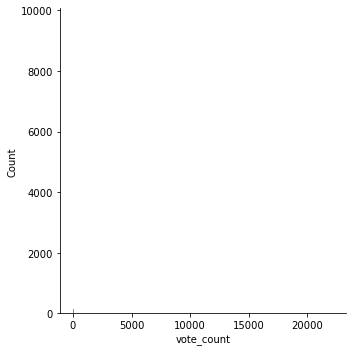

In [31]:
sns.displot(data = df, x = "vote_count")

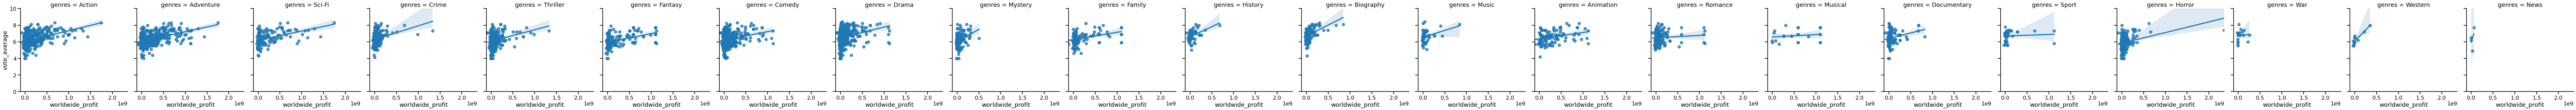

In [32]:
sns.set_context("talk")

sns.lmplot(data = dfgenres, x = "worldwide_profit", y = "vote_average", col = "genres").set(ylim = (0, 10))


In [33]:
df = dfgenres.drop_duplicates(subset = "index").sort_values("worldwide_profit", ascending = False)
df

,index,popularity,release_date,title,vote_average,vote_count,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,total_votes
370,0,26.526,2009-12-18,avatar,7.4,18676,93.0,Horror,425000000,760507625,2776345279,335507625,2351345279,138202.4
0,6,80.773,2018-04-27,avengersinfinitywar,8.3,13948,149.0,Action,300000000,678815482,2048134200,378815482,1748134200,115768.4
709,33,20.709,2015-06-12,jurassicworld,6.6,14056,124.0,Action,215000000,652270625,1648854864,437270625,1433854864,92769.6
735,66,20.396,2015-04-03,furious7,7.3,6538,137.0,Action,190000000,353007020,1518722794,163007020,1328722794,47727.4
8,26,50.289,2012-05-04,theavengers,7.6,19673,143.0,Action,225000000,623279547,1517935897,398279547,1292935897,149514.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,746,16.824,2015-01-16,blackhat,5.3,1165,133.0,Action,70000000,8005980,19665004,-61994020,-50334996,6174.5
661,254,21.377,2013-07-19,r.i.p.d.,5.6,2047,96.0,Action,130000000,33618855,79076678,-96381145,-50923322,11463.2
4011,280,8.827,2017-01-13,monstertrucks,5.9,414,104.0,Action,125000000,33370166,61642798,-91629834,-63357202,2442.6
3388,477,10.158,2017-04-21,thepromise,7.1,195,NaN,Drama,90000000,8224288,10551417,-81775712,-79448583,1384.5


In [34]:
df = df.drop_duplicates(subset = "title")

In [35]:
df.to_sql("intermediate", conn)

ValueError: Table 'intermediate' already exists.

In [36]:
df = pd.read_sql("""
SELECT *,
vote_average*vote_count AS total_votes
FROM intermediate
WHERE domestic_gross > 0 AND worldwide_gross > 0
""", conn)

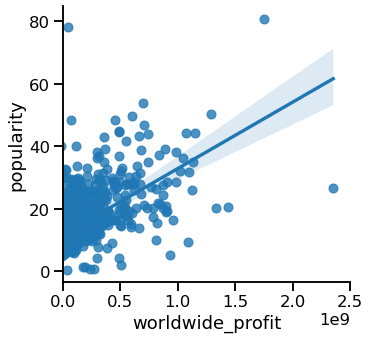

In [37]:
sns.lmplot(data = df, x = "worldwide_profit", y = "popularity", legend = True).set(xlim = (0, 2500000000))

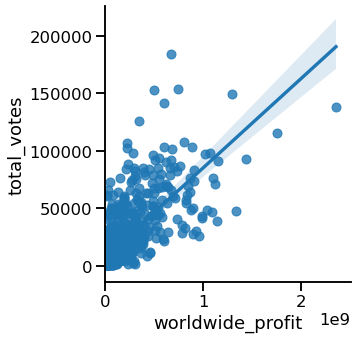

In [38]:
sns.lmplot(data = df, x = "worldwide_profit", y = "total_votes", legend = True).set(xlim = (0, 2500000000))

In [39]:
df.groupby("genres").mean().sort_values("worldwide_profit", ascending = False)

,level_0,index,popularity,vote_average,vote_count,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,total_votes
genres,,,,,,,,,,,,
Musical,246.000000,412.000000,29.056000,6.700000,4517.000000,150.000000,9.500000e+07,2.011514e+08,5.345514e+08,1.061514e+08,4.395514e+08,30263.900000
Animation,1973.500000,1247.200000,15.159400,6.850000,3657.900000,90.222222,7.205000e+07,1.387714e+08,3.558675e+08,6.672139e+07,2.838175e+08,24964.870000
Adventure,2189.936170,1192.815603,15.443574,6.389362,2975.092199,104.478571,8.605532e+07,1.088650e+08,3.048911e+08,2.280967e+07,2.188358e+08,20493.489362
Mystery,1222.333333,1244.333333,17.301000,7.300000,7618.000000,118.333333,5.233333e+07,1.114222e+08,2.376665e+08,5.908886e+07,1.853331e+08,57771.600000
Action,1832.213368,1236.210797,17.960501,6.286375,3665.676093,113.189119,8.494833e+07,9.813334e+07,2.689586e+08,1.318501e+07,1.840102e+08,24589.911311
Horror,2915.160000,3684.413333,12.501387,5.794667,1871.106667,95.162162,1.814333e+07,4.947726e+07,1.174736e+08,3.133393e+07,9.933028e+07,12107.361333
Romance,2001.000000,1080.000000,13.717000,6.600000,2615.000000,106.000000,5.020000e+07,6.249564e+07,1.269313e+08,1.229564e+07,7.673132e+07,17259.000000
Documentary,3408.050000,3298.950000,11.392000,6.555000,1205.550000,84.555556,1.827000e+07,4.021911e+07,7.438691e+07,2.194911e+07,5.611691e+07,8044.190000
Biography,3252.951923,2717.086538,12.219683,6.960577,1637.509615,115.769231,2.367192e+07,3.794378e+07,7.687860e+07,1.427186e+07,5.320668e+07,12156.191346


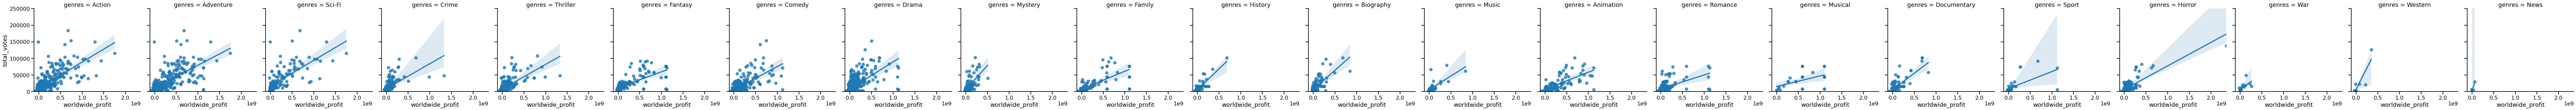

In [40]:
sns.lmplot(data = dfgenres, x = "worldwide_profit", y = "total_votes", col = "genres").set(ylim = (0, 250000))

# Make graph of why I used 100 votes or more as the cut off for the data frames

In [54]:
dtesting = pd.read_sql("""
SELECT *,
vote_average*vote_count AS total_votes
FROM general_movie_stats
WHERE vote_count > 0 AND domestic_gross > 0 AND worldwide_gross > 0
ORDER BY vote_count DESC
""", conn).drop_duplicates(subset = "index")

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

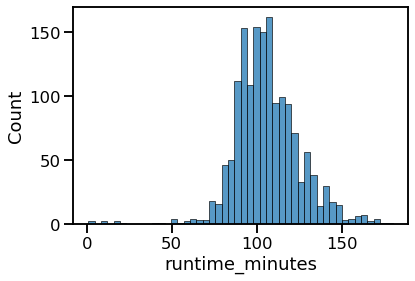

In [55]:
sns.histplot(data = dtesting, x = "runtime_minutes")

In [57]:
pd.read_sql("""
SELECT *,
vote_average*vote_count AS total_votes
FROM general_movie_stats
WHERE runtime_minutes < 48 AND domestic_gross > 0 AND worldwide_gross > 0
ORDER BY vote_count DESC
""", conn).drop_duplicates(subset = "index")

,index,popularity,release_date,title,vote_average,vote_count,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,total_votes
0,1382,16.730,2014-07-25,Lucy,6.3,10019,9.0,Animation,40000000,126573960,457507776,86573960,417507776,63119.7
3,2090,19.453,2011-03-08,Limitless,7.1,6295,3.0,Biography,27000000,79249455,155564919,52249455,128564919,44694.5
5,2763,14.979,2014-05-09,Neighbors,6.2,4536,22.0,Documentary,18000000,150086800,270944428,132086800,252944428,28123.2
7,663,17.410,2016-10-28,Inferno,5.9,3877,16.0,Documentary,75000000,34343574,219519367,-40656426,144519367,22874.3
9,1570,14.623,2013-09-27,Rush,7.7,3877,10.0,Action,38000000,26947624,98230839,-11052376,60230839,29852.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,3109,0.600,2013-08-10,The Love Letter,5.0,2,12.0,Adventure,15000000,8322608,9010980,-6677392,-5989020,10.0
288,4100,0.600,2015-12-04,The Messenger,8.0,2,10.0,Documentary,6500000,1109660,1744952,-5390340,-4755048,16.0
289,3142,0.600,2016-04-17,The Return,7.0,2,16.0,Documentary,15000000,501752,5953886,-14498248,-9046114,14.0
378,5744,0.600,2013-06-21,Emily,7.0,1,26.0,Documentary,27000,3547,3547,-23453,-23453,7.0
